## 19002065
## Jaime Ariel Chitay
#### Carga y normalización de la data

In [7]:
import matplotlib.pyplot as plt
import imageio as imio
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn import preprocessing # For scaling
from sklearn.manifold import TSNE

In [8]:
images_inception_features = './pre-processing/training_inception_features_array.npy'
training_image_labels_array = './pre-processing/training_image_labels_array.npy'
training_image_names_array = './pre-processing/training_image_names_array.npy'

In [9]:
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array)
training_set_dict['label'] = np.load(training_image_labels_array)
training_set_dict['features'] = np.load(images_inception_features)

In [10]:
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

In [11]:
labels_unique = np.unique(labels)
print(len(labels_unique)) ## Esto permite conocer cuántas razas de perros contiene el dataset.

120


In [13]:
print(features.shape)
print(labels.shape)

(10222, 2048)
(10222,)


#### Normalización de los datos:

In [14]:
from sklearn import preprocessing
stscaler = preprocessing.StandardScaler()
data_escalada = stscaler.fit_transform(features)

### Implementación PCA (2 dimensiones)

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data_escalada)
X2d = pca.fit_transform(data_escalada)

In [17]:
print(data_escalada.shape)
print(X2d.shape)

(10222, 2048)
(10222, 2)


Se aplica label enconder en las labels para poder graficar:

In [18]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(labels)
labels_enc = label_encoder.transform(labels)

In [19]:
print(labels_enc)  ## Cada número representa una raza

[19 37 85 ...  3 75 28]


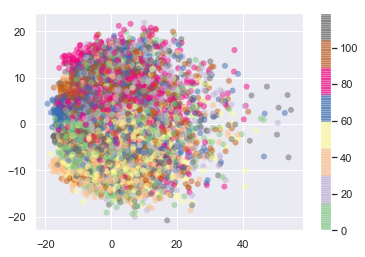

In [20]:
plt.scatter(X2d[:, 0], X2d[:, 1],
            c=labels_enc, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 120))
plt.colorbar()

### Clustering con versión reducida

In [21]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=120, random_state=0).fit(X2d)
Kmeans.predict(X2d)

array([113,  14,  98, ..., 114, 118,  88])

In [22]:
clustersk = Kmeans.cluster_centers_
print(clustersk)

[[-6.95394945e+00  7.78072786e+00]
 [ 3.19312334e+00 -7.36633682e+00]
 [ 1.53910427e+01  8.40629196e+00]
 [-2.76964664e+00 -5.00359964e+00]
 [ 1.61613524e+00  6.05464840e+00]
 [-1.00203218e+01 -8.97778606e+00]
 [ 1.84621735e+01 -6.83843279e+00]
 [ 3.44063759e+01 -9.66104889e+00]
 [-1.11705208e+01 -2.77390218e+00]
 [-3.65798831e+00  9.73865509e+00]
 [-8.91889572e+00  2.13438797e+00]
 [ 4.43182182e+00  1.39840937e+01]
 [-3.54337335e+00 -3.58162224e-01]
 [ 6.05285406e+00  1.56141961e+00]
 [ 1.04885082e+01 -5.42008495e+00]
 [-3.99482012e+00 -1.05680237e+01]
 [-1.38059740e+01  7.37707710e+00]
 [ 2.45373802e+01  1.07318182e+01]
 [ 6.06620193e-01 -3.28084683e+00]
 [ 1.52352610e+01 -9.68044662e+00]
 [ 1.13717136e+01 -1.13093481e+01]
 [ 6.51868010e+00  1.11982775e+01]
 [ 1.12652864e+01  1.76831036e+01]
 [ 1.66014786e+01 -3.18617201e+00]
 [ 3.48566284e+01  6.01910019e+00]
 [-7.64417648e+00  1.49497042e+01]
 [-3.69940853e+00  1.57914448e+01]
 [-1.56384020e+01 -8.33922672e+00]
 [ 1.84809723e+01  1

In [23]:
Kmeans.cluster_centers_.shape

(120, 2)

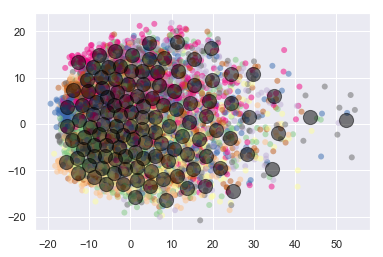

In [24]:
plt.scatter(X2d[:, 0], X2d[:, 1],
            c=labels_enc, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 120))
plt.scatter(clustersk[:, 0], clustersk[:, 1], c='black', s=200, alpha=0.5);